<a href="https://colab.research.google.com/github/aureliosaraiva/ia-test/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:

df=pd.read_csv('gdrive/My Drive/Curso IA/AutoInsurance.csv')
df=df.drop('Customer', axis=1)
print(df.columns)
#df=df[['Education', 'Gender', 'State', 'Income', 'Coverage', 'Policy']]

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [6]:
df.head()

State  Customer Lifetime Value Response  Coverage Education  \
0  Washington              2763.519279       No     Basic  Bachelor   
1     Arizona              6979.535903       No  Extended  Bachelor   
2      Nevada             12887.431650       No   Premium  Bachelor   
3  California              7645.861827       No     Basic  Bachelor   
4  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  ...  \
0           2/24/11         Employed      F   56274      Suburban  ...   
1           1/31/11       Unemployed      F       0      Suburban  ...   
2           2/19/11         Employed      F   48767      Suburban  ...   
3           1/20/11       Unemployed      M       0      Suburban  ...   
4          3/2/2011         Employed      M   43836         Rural  ...   

  Months Since Policy Inception  Number of Open Complaints  \
0                             5                          0   
1                            42                          0   
2                            38                          0   
3                            65                          0   
4                            44                          0   

   Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3            Offer1   
1                   8   Personal Auto   Personal L3            Offer3   
2                   2   Personal Auto   Personal L3            Offer1   
3                   7  Corporate Auto  Corporate L2            Offer1   
4                   1   Personal Auto   Personal L1            Offer1   

  Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent         384.811147   Two-Door Car      Medsize  
1         Agent        1131.464935  Four-Door Car      Medsize  
2         Agent         566.472247   Two-Door Car      Medsize  
3   Call Center         529.881344            SUV      Medsize  
4         Agent         138.130879  Four-Door Car      Medsize  

[5 rows x 23 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for h in ['State', 'Customer Lifetime Value', 'Coverage','Response',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status',
       'Months Since Last Claim',
         'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']:
  df[h] = encoder.fit_transform(df[h])




In [12]:
df.head()

State  Customer Lifetime Value  Response  Coverage  Education  \
0      4                      975         0         0          0   
1      0                     4659         0         1          0   
2      2                     6900         0         2          0   
3      1                     5140         0         0          0   
4      4                     1058         0         0          0   

   Effective To Date  EmploymentStatus  Gender  Income  Location Code  ...  \
0                 40                 1       0   56274              1  ...   
1                 20                 4       0       0              1  ...   
2                 34                 1       0   48767              1  ...   
3                  9                 4       1       0              1  ...   
4                 46                 1       1   43836              0  ...   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Policy Type  Policy  Renew Offer Type  Sales Channel  \
0                   1            0       2                 0              0   
1                   8            1       5                 2              0   
2                   2            1       5                 0              0   
3                   7            0       1                 0              2   
4                   1            1       3                 0              0   

   Total Claim Amount  Vehicle Class  Vehicle Size  
0          384.811147              5             1  
1         1131.464935              0             1  
2          566.472247              5             1  
3          529.881344              3             1  
4          138.130879              0             1  

[5 rows x 23 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   int64  
 1   Customer Lifetime Value        9134 non-null   int64  
 2   Response                       9134 non-null   int64  
 3   Coverage                       9134 non-null   int64  
 4   Education                      9134 non-null   int64  
 5   Effective To Date              9134 non-null   int64  
 6   EmploymentStatus               9134 non-null   int64  
 7   Gender                         9134 non-null   int64  
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   int64  
 10  Marital Status                 9134 non-null   int64  
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [14]:
df.isnull().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [15]:
price_corr = df.corr()['Policy'].sort_values(ascending=False)
print(price_corr)

Policy                           1.000000
Policy Type                      0.879964
Number of Open Complaints        0.019019
State                            0.014241
Location Code                    0.012086
Education                        0.011119
Customer Lifetime Value          0.009193
Marital Status                   0.008139
Income                           0.005032
Total Claim Amount               0.000858
Vehicle Class                   -0.000223
EmploymentStatus                -0.001159
Monthly Premium Auto            -0.001258
Response                        -0.001461
Sales Channel                   -0.002125
Vehicle Size                    -0.002232
Coverage                        -0.002317
Gender                          -0.003123
Renew Offer Type                -0.003654
Months Since Policy Inception   -0.006202
Number of Policies              -0.007944
Months Since Last Claim         -0.013001
Effective To Date               -0.013063
Name: Policy, dtype: float64


<Axes: title={'center': 'Pearson Correlation Matrix'}>

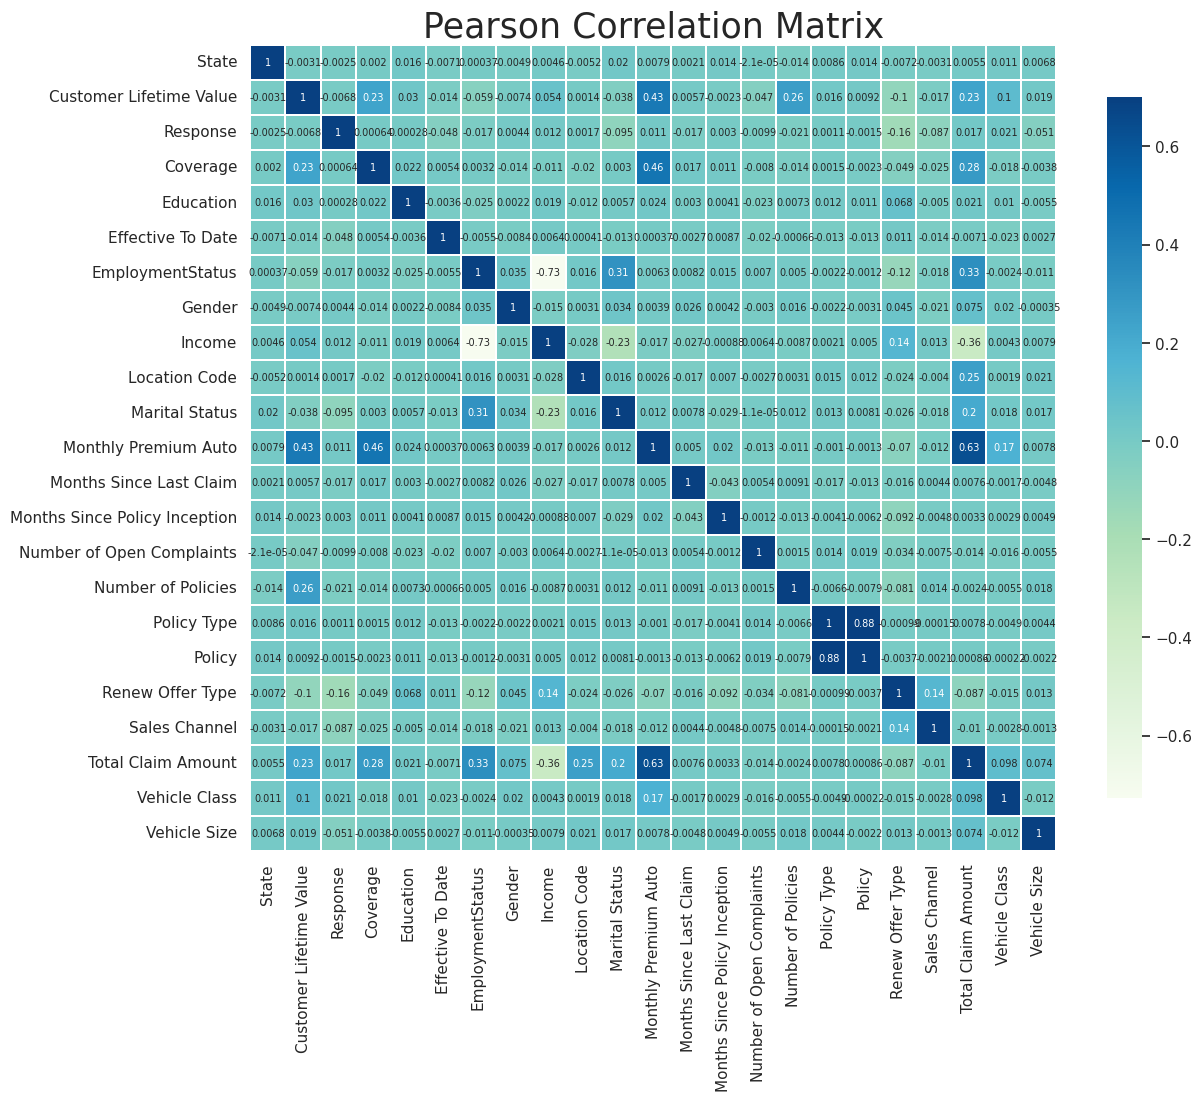

In [18]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [19]:
print(df.columns)

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


<ipython-input-20-ca12c50f9633>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column1], ax=axes[0])


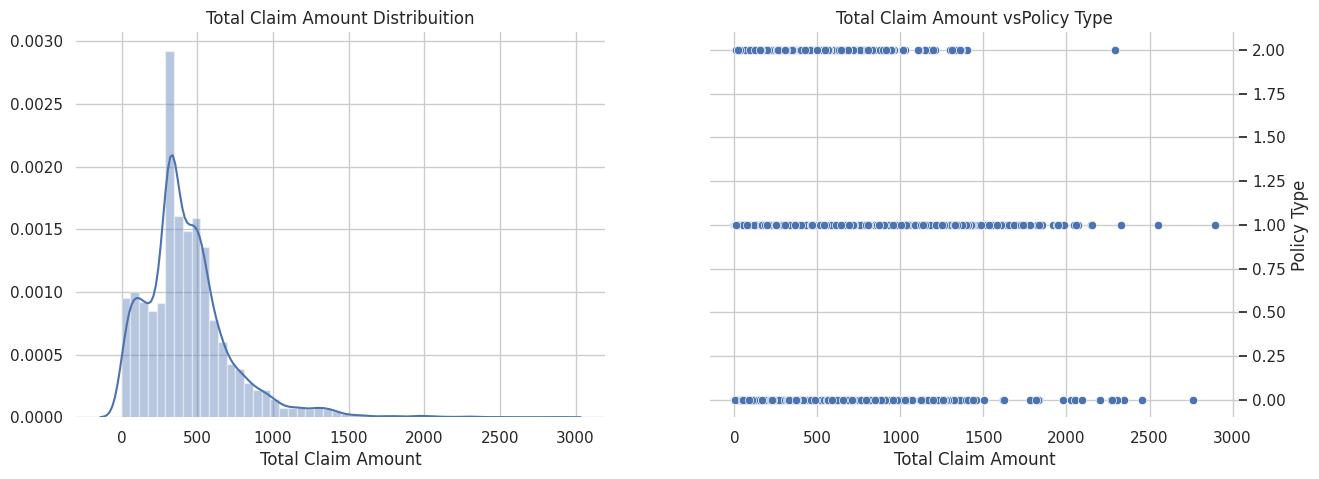

In [20]:
def create(column1, column2):
  f, axes = plt.subplots(1, 2,figsize=(15,5))
  sns.distplot(df[column1], ax=axes[0])
  sns.scatterplot(x=column1,y=column2, data=df, ax=axes[1])
  sns.despine(bottom=True, left=True)
  axes[0].set(xlabel=column1, ylabel='', title=column1 + ' Distribuition')
  axes[1].set(xlabel=column1, ylabel=column2, title=column1 + ' vs'+column2)
  axes[1].yaxis.set_label_position("right")
  axes[1].yaxis.tick_right()

create('Total Claim Amount', 'Policy Type')

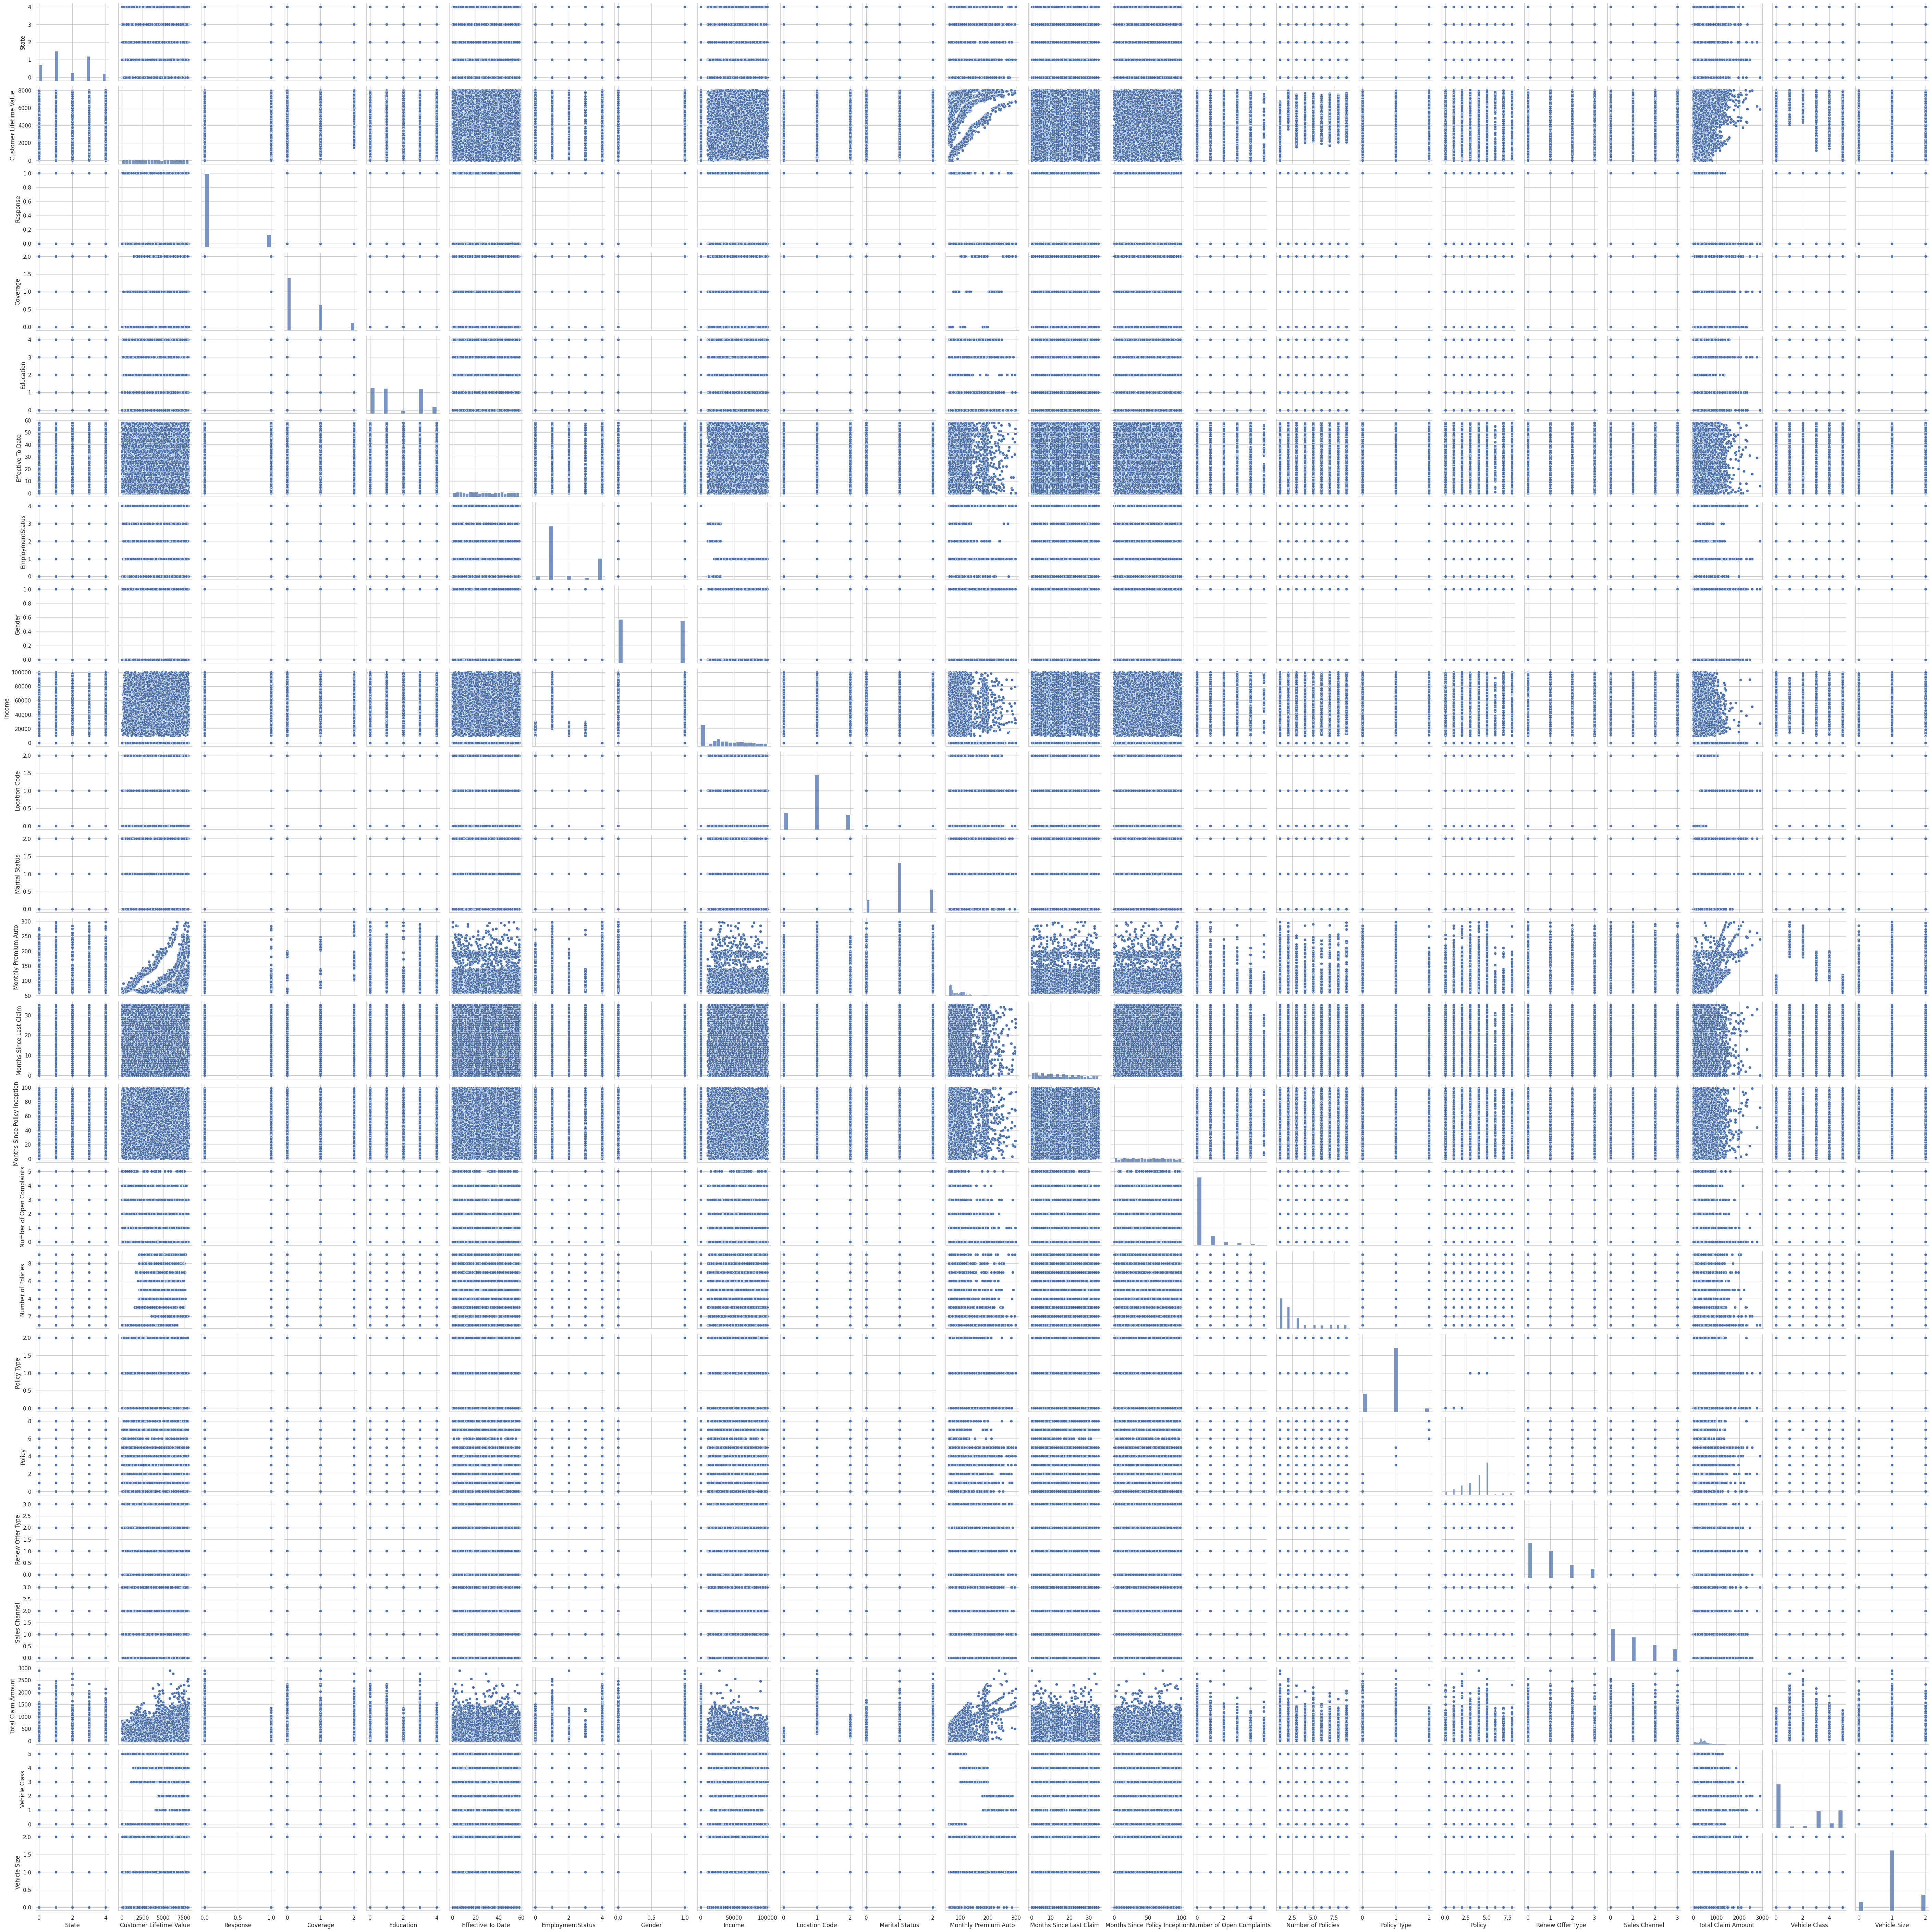

In [21]:
sns.pairplot(df)

In [127]:
# Features
X = df.drop('Policy',axis=1)

# Label
y = df['Policy']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [128]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 5)
(2741, 5)
(6393,)
(2741,)


In [166]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())


Max:  1.0
Min:  0.0


In [160]:
from tensorflow.keras.models import Sequential
model = Sequential()

# input layer
model.add(layers.Dense(5,activation='relu'))

# hidden layers
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(5,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(5,activation='relu'))

# output layer
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')

In [161]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
50/50 [==============================] - 2s 10ms/step - loss: 16.2569 - val_loss: 14.8982
Epoch 2/400
50/50 [==============================] - 0s 6ms/step - loss: 12.6454 - val_loss: 8.6697
Epoch 3/400
50/50 [==============================] - 0s 6ms/step - loss: 4.9938 - val_loss: 3.1853
Epoch 4/400
50/50 [==============================] - 0s 10ms/step - loss: 3.1843 - val_loss: 3.0145
Epoch 5/400
50/50 [==============================] - 0s 8ms/step - loss: 3.0343 - val_loss: 2.8880
Epoch 6/400
50/50 [==============================] - 0s 5ms/step - loss: 2.9199 - val_loss: 2.7901
Epoch 7/400
50/50 [==============================] - 0s 4ms/step - loss: 2.8356 - val_loss: 2.7178
Epoch 8/400
50/50 [==============================] - 0s 4ms/step - loss: 2.7729 - val_loss: 2.6671
Epoch 9/400
50/50 [==============================] - 0s 4ms/step - loss: 2.7295 - val_loss: 2.6291
Epoch 10/400
50/50 [==============================] - 0s 4ms/step - loss: 2.6960 - val_loss: 2.6025
Epoc

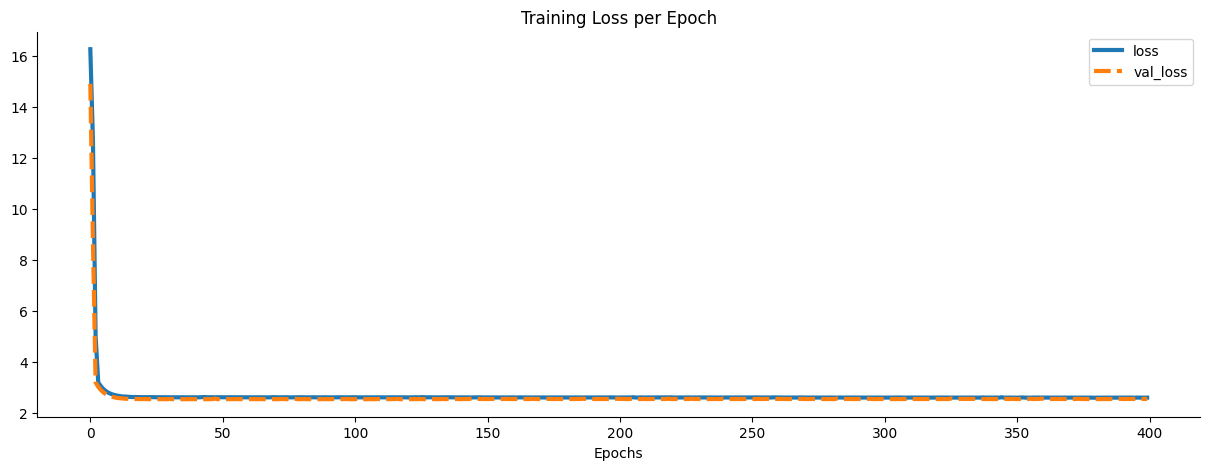

In [162]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [164]:
vehicle_test = df.iloc[[56]]
vehicle = vehicle_test.drop('Policy',axis=1)
print(vehicle_test)
print(vehicle)

raw = scaler.transform(vehicle.values.reshape(-1, 5))

print('\nPrediction:',model.predict(raw))



    Education  Gender  State  Income  Coverage  Policy
56          1       1      1   64749         0       7
    Education  Gender  State  Income  Coverage
56          1       1      1   64749         0
1/1 [==============================] - 0s 23ms/step

Prediction: [[3.7380269]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
